In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
predicted_standings = pd.read_csv('season_simulation.csv')

earnings = {1: 149.6, 2: 145.9, 3: 142.1, 4: 138.4, 5: 73.7, 6: 70.0, 7: 55.2, 8: 33.5, 9: 29.8, 10: 26.0, 11: 22.3, 12: 18.6, 13: 14.9, 14: 11.2, 15: 7.5, 16: 3.7, 17: 0, 18: -88.7, 19: -92.5, 20: -96.2}

# Convert earnings to a DataFrame with position as the index and earnings as the values
earnings_df = pd.DataFrame(list(earnings.items()), columns=['Position', 'Earnings'])

In [3]:
predicted_standings.head()

,Unnamed: 0,team,avg_position,position_std,avg_points,points_std,avg_goals_for,goals_for_std,avg_goals_against,goals_against_std,avg_revenue,revenue_std
0,1,Liverpool,2.195,1.388850,76.771,7.347145,62.175,7.761870,26.109,5.147584,141.5247,19.612183
1,2,Arsenal,2.259,1.383413,76.233,7.054820,53.439,7.396958,20.169,4.456939,141.5708,18.669331
2,3,Man City,2.572,1.527465,74.593,7.355369,60.762,8.059299,28.440,5.400701,137.5185,24.191229
3,4,Chelsea,6.410,3.063868,61.040,7.655260,51.376,7.176219,38.456,6.041073,77.6787,46.577173
4,5,Newcastle,6.829,3.179602,59.834,7.728530,49.871,7.115827,38.514,6.321057,71.0823,45.533276


In [4]:
# Get average league table
average_league_table = predicted_standings[['Unnamed: 0', 'team', 'avg_points']]

In [5]:
# create a column that says whether if the average points increases by 3 it is greater than the team above them in the table for each team
average_league_table['avg_points_plus_3'] = average_league_table['avg_points'] + 3
# Shift the avg_points_plus_3 up one row to compare with the team above
average_league_table['avg_points_plus_3'] = average_league_table['avg_points_plus_3'].shift(-1)
# Create a column that says whether the team above them in the table has more points than them
average_league_table['avg_points_greater'] = average_league_table['avg_points_plus_3'] > average_league_table['avg_points']

average_league_table.head()

C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\647499024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['avg_points_plus_3'] = average_league_table['avg_points'] + 3
C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\647499024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['avg_points_plus_3'] = average_league_table['avg_points_plus_3'].shift(-1)
C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\647499024.py:6: SettingWithCopyWarning: 
A value is trying 

,Unnamed: 0,team,avg_points,avg_points_plus_3,avg_points_greater
0,1,Liverpool,76.771,79.233,True
1,2,Arsenal,76.233,77.593,True
2,3,Man City,74.593,64.040,False
3,4,Chelsea,61.040,62.834,True
4,5,Newcastle,59.834,62.091,True


In [6]:
average_league_table.tail()

,Unnamed: 0,team,avg_points,avg_points_plus_3,avg_points_greater
15,16,Wolves,44.521,46.698,True
16,17,West Ham,43.698,33.590,False
17,18,Ipswich,30.590,30.217,False
18,19,Leicester,27.217,25.052,False
19,20,Southampton,22.052,NaN,False


In [7]:
# If avg_points_greater is true, then the team below them in the table will have a higher points total if they increase their points by 3 through a lucky win
# then if avg_points_greater is true, add to a new column called 'lucky_place' the value of Unnamed: 0 or else add 0
if average_league_table['avg_points_greater'].any():
    average_league_table['lucky_place'] = average_league_table['Unnamed: 0'].where(average_league_table['avg_points_greater'], 0)
else:
    average_league_table['lucky_place'] = 0

# Shift the lucky_place column up one row to compare with the team above
average_league_table['lucky_place'] = average_league_table['lucky_place'].shift(1)

average_league_table.head()

C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\3425550238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['lucky_place'] = average_league_table['Unnamed: 0'].where(average_league_table['avg_points_greater'], 0)
C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\3425550238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['lucky_place'] = average_league_table['lucky_place'].shift(1)


,Unnamed: 0,team,avg_points,avg_points_plus_3,avg_points_greater,lucky_place
0,1,Liverpool,76.771,79.233,True,NaN
1,2,Arsenal,76.233,77.593,True,1.0
2,3,Man City,74.593,64.040,False,2.0
3,4,Chelsea,61.040,62.834,True,0.0
4,5,Newcastle,59.834,62.091,True,4.0


In [8]:
# Replace lucky_place in the first row with 0
average_league_table['lucky_place'].iloc[0] = 0

C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\1529812346.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  average_league_table['lucky_place'].iloc[0] = 0
C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\1529812346.py:2: SettingWithCo

In [9]:
# Create a column called simulated_earnings that is equal to the earnings of each team based on the Unnamed: 0 column
average_league_table['simulated_earnings'] = average_league_table['Unnamed: 0'].map(earnings)
# In the lucky_place column, if the value is 0, set it equal to the value in the Unnamed: 0 column
average_league_table['lucky_place'] = average_league_table['lucky_place'].where(average_league_table['lucky_place'] != 0, average_league_table['Unnamed: 0'])

C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\4251612979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['simulated_earnings'] = average_league_table['Unnamed: 0'].map(earnings)
C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\4251612979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['lucky_place'] = average_league_table['lucky_place'].where(average_league_table['lucky_place'] != 0, average_league_table['Unnamed: 0'])


In [10]:
# Create a new column called lucky_earnings that is equal to the earnings of each team based on the lucky_place column
average_league_table['lucky_earnings'] = average_league_table['lucky_place'].map(earnings)
# Create a column with the difference between the lucky_earnings and simulated_earnings
average_league_table['earnings_difference'] = average_league_table['lucky_earnings'] - average_league_table['simulated_earnings']

C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\3318204426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['lucky_earnings'] = average_league_table['lucky_place'].map(earnings)
C:\Users\sdelo\AppData\Local\Temp\ipykernel_62184\3318204426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_league_table['earnings_difference'] = average_league_table['lucky_earnings'] - average_league_table['simulated_earnings']


In [11]:
average_league_table.head()

,Unnamed: 0,team,avg_points,avg_points_plus_3,avg_points_greater,lucky_place,simulated_earnings,lucky_earnings,earnings_difference
0,1,Liverpool,76.771,79.233,True,1.0,149.6,149.6,0.0
1,2,Arsenal,76.233,77.593,True,1.0,145.9,149.6,3.7
2,3,Man City,74.593,64.040,False,2.0,142.1,145.9,3.8
3,4,Chelsea,61.040,62.834,True,4.0,138.4,138.4,0.0
4,5,Newcastle,59.834,62.091,True,4.0,73.7,138.4,64.7


In [12]:
# Sort the average_league_table by the earnings_difference column in descending order
average_league_table = average_league_table.sort_values(by='earnings_difference', ascending=False)

# view the top 5 rows of the average_league_table
average_league_table.head()

,Unnamed: 0,team,avg_points,avg_points_plus_3,avg_points_greater,lucky_place,simulated_earnings,lucky_earnings,earnings_difference
4,5,Newcastle,59.834,62.091,True,4.0,73.7,138.4,64.7
7,8,Bournemouth,52.476,55.312,True,7.0,33.5,55.2,21.7
2,3,Man City,74.593,64.040,False,2.0,142.1,145.9,3.8
9,10,Nott'm Forest,51.843,54.546,True,9.0,26.0,29.8,3.8
15,16,Wolves,44.521,46.698,True,15.0,3.7,7.5,3.8


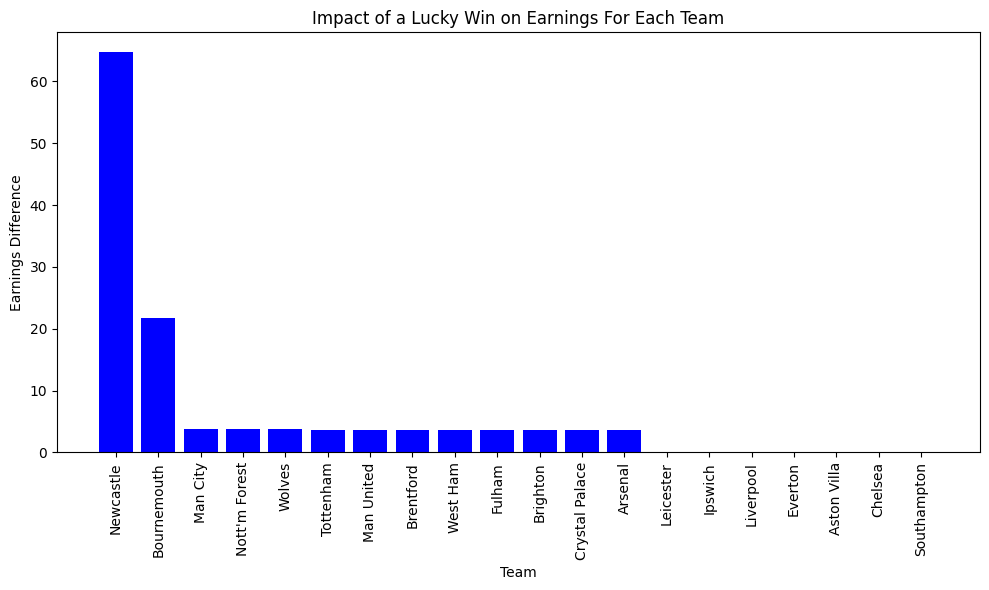

In [13]:
# Create a bar plot of the earnings_difference column
plt.figure(figsize=(10, 6))
plt.bar(average_league_table['team'], average_league_table['earnings_difference'], color='blue')
plt.xlabel('Team')
plt.ylabel('Earnings Difference')
plt.title('Impact of a Lucky Win on Earnings For Each Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()